# Chapter 8 : Vapor Power Systems

* Michael J . Mora. Fundamentals of Engineering Thermodynamics(7th Edition). John Wiley & Sons, Inc. 2011


## Example 8.1:Analyzing an Ideal Rankine Cycle Page 438

Steam is the working fluid in an ideal Rankine cycle. 

Saturated vapor enters the turbine at 8.0 MPa and saturated liquid exits the condenser at a pressure of 0.008 MPa. 

The net power output of the cycle is 100 MW.

![tete](./img/vps-fig81.png)


* **Process 1–2:** **Isentropic expansion** of the working fluid through the turbine from saturated vapor at state 1 to the condenser pressure.
* **Process 2–3:** Heat transfer from the working fluid as it flows at **constant pressure**
through the condenser with saturated liquid at state 3.
* **Process 3–4:** **Isentropic compression** in the pump to state 4 in the compressed liquid region.
* **Process 4–1:** Heat transfer to the working fluid as it flows at **constant pressure** through the boiler to complete the cycle.


Determine for the cycle

(a) the thermal efficiency,

(b) the back work ratio, 

(c) the mass flow rate of the steam,in kg/h,

(d) the rate of heat transfer, Qin, into the working fluid as it passes through the boiler, in MW,

(e) the rate of heat transfer, Qout, from the condensing steam as it passes through the condenser, in MW,

(f) the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15C and exits at 35C.


### Engineering Model:

* 1 Each **component** of the cycle is analyzed as a **control volume** at steady state. The control volumes are shown on the accompanying sketch by **dashed** lines.


* 2 All processes of the working fluid are internally reversible.


* 3 The turbine and pump operate adiabatically.


* 4 Kinetic and potential energy effects are negligible.


* 5 Saturated vapor enters the turbine. Condensate exits the condenser as saturated liquid.

## Analysis:

To begin the analysis, we fix each of **the principal states（1，2，3，4)** located on the accompanying schematic and **T–s** diagrams.

In [1]:
from seuif97 import *

# Given:-
p1 = 8.0               #  in MPa
p3 = 0.008             # pressure of saturated liquid exiting the condenser in MPa
Wcycledot = 100.00     # the net power output of the cycle in MW

# Analysis

# State  1
h1=px2h(p1,1)          # h1 = 2758.0    From table A-3  kj/kg
s1=px2s(p1,1)          # s1 = 5.7432    From table A-3  kj/kg.k

# State  2
s2 = s1

# quality at state 2
sf=px2s(p3,0)         # sf = 0.5926   kj/kg.k
sg=px2s(p3,1)         # sg = 8.2287   kj/kg.k
x2=(s2-sf)/(sg-sf)

hf=px2h(p3,0)         # hf = 173.88    kj/kg
hg=px2h(p3,1)         
h2 = hf + x2*(hg-hf)      #  hfg = 2403.1   kj/kg

# State 3 is saturated liquid at 0.008 MPa, so
h3 = hf                                         #  kj/kg
v3 =px2v(p3,0)                #1.0084e-3  m^3/kg

#State 4 
p4 = p1
h4 = h3 + v3*(p4-p3)*10**6*10**-3    # kj/kg

### (a) The thermal efficiency

The net power developed by the cycle is

$\dot{W}_{cycle}=\dot{W}_t-\dot{W}_p$

Mass and energy rate balances for control volumes around the turbine and pump give,respectively

$\frac{\dot{W}_t}{\dot{m}}=h_1-h_2$  
$\frac{\dot{W}_p}{\dot{m}}=h_4-h_3$

where $\dot{m}$ is the mass flow rate of the steam. The rate of heat transfer to the working fluid as it passes through the boiler is determined using mass and energy rate balances as

$\frac{\dot{Q}_{in}}{\dot{m}}=h_1-h_4$

The thermal efficiency is then


$\eta=\frac{\dot{W}_t-\dot{W}_p}{\dot{Q}_{in}}=\frac{(h_1-h_2)-(h_4-h_3)}{h_1-h_4}$


In [2]:
# Part(a)
# Mass and energy rate balances for control volumes 
# around the turbine and pump give, respectively

# turbine
wtdot = h1 - h2
# pump
wpdot = h4-h3

# The rate of heat transfer to the working fluid as it passes 
# through the boiler is determined using mass and energy rate balances as
qindot = h1-h4

# thermal efficiency
eta = (wtdot-wpdot)/qindot   

# Result for part a
print('(a) The thermal efficiency for the cycle is ',round(eta,3))

(a) The thermal efficiency for the cycle is  0.371


In [3]:
# Part(b)
# back work ratio：bwr, defined as the ratio of the pump work input to the work 
# developed by the turbine.
bwr = wpdot/wtdot                                    # 

# Result
print('(b) The back work ratio is ',round(bwr,3)*100,'%')

# Part(c)
mdot = (Wcycledot*10**3*3600)/((h1-h2)-(h4-h3))       # mass flow rate in kg/h

# Result 
print('(c) The mass flow rate of the steam is',round(mdot,2),'kg/h.')
 
# Part(d)
Qindot = mdot*qindot/(3600*10**3)                     # in MW

# Results
print('(d) The rate of heat transfer Qindot into the working fluid as'+
      ' it passes through the boiler is',round(Qindot,2),'MW.')

# Part(e)
Qoutdot = mdot*(h2-h3)/(3600*10**3)                   # in MW

# Results
print('(e) The rate of heat transfer Qoutdot from the condensing steam '+
      'as it passes through the condenser is {:.2f} MW.'.format(Qoutdot))

# Part(f)
# Given: 
tcwin=15
tcwout=35

hcwout=tx2h(tcwout,0)   # From table A-2,hcwout= 146.68  kj/kg  

hcwin= tx2h(tcwin,0)    # hcwin 62.99  
mcwdot= (Qoutdot*10**3*3600)/(hcwout-hcwin)          # in kg/h

# Results
print('(f) The mass flow rate of the condenser cooling water is %.2f kg/h.'%mcwdot )

(b) The back work ratio is  0.8 %
(c) The mass flow rate of the steam is 376776.21 kg/h.
(d) The rate of heat transfer Qindot into the working fluid as it passes through the boiler is 269.68 MW.
(e) The rate of heat transfer Qoutdot from the condensing steam as it passes through the condenser is 169.68 MW.
(f) The mass flow rate of the condenser cooling water is 7301347.42 kg/h.


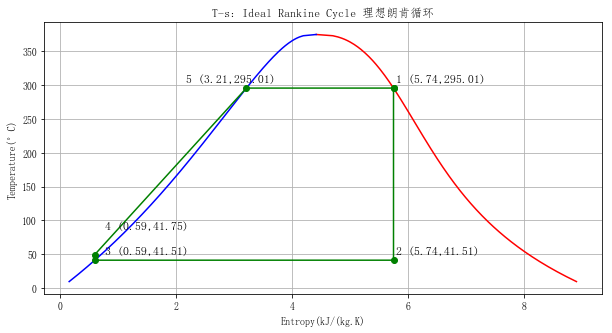

In [4]:
%matplotlib inline

#from matplotlib.font_manager import * 
from matplotlib import rcParams # figure Params

import matplotlib.pyplot as plt
import numpy as np

# set fonts, Windows only
# for Chinese: FangSong or simfang,y
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif']=['FangSong'] # Chinese-FangSong

rcParams['axes.unicode_minus']=False

# optional-chinese
#myfont=FontProperties(fname='C:/Windows/Fonts/simfang.ttf') 


#plt.figure()
plt.figure(figsize=(10.0,5.0)) # figsize :set figure size

# saturated vapor and liquid entropy lines 
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]] # saturated vapor tx2s(t, 1),x=1
sliq = [s for s in [tx2s(t, 0) for t in npt]] # saturated liquid tx2s(t, 0),x=0
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

# Rankine T-S
t1=px2t(p1,1)
t2=px2t(p3,0)

t3=t2
s3=tx2s(t3,0)

s4=s3
t4=ps2t(p4,s4) 
# t4稍高于t3，直接绘图3，4点几乎重叠,
# 调整t4为显示虚拟值，消除重叠，定性反映热力过程
t4=t4+8

t5=px2t(p1,0)
s5=px2s(p1,0)

tt=[t1,t2,t3,t4,t5,t1] 
ss=[s1,s2,s3,s4,s5,s1]

plt.plot(ss, tt, 'go-')

plt.annotate('1 ({:.2f},{:.2f})'.format(s1,t1),
             xy=(s1, t1), xycoords='data',
             xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('2 ({:.2f},{:.2f})'.format(s2,t2),
             xy=(s2, t2), xycoords='data',
             xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('3 ({:.2f},{:.2f})'.format(s3,t3),
             xy=(s3, t3), xycoords='data',
             xytext=(+10, +5), textcoords='offset points', fontsize=12)

plt.annotate('4 ({:.2f},{:.2f})'.format(s4,t4-8),
             xy=(s4, t4), xycoords='data',
             xytext=(+10, +25), textcoords='offset points', fontsize=12)


plt.annotate('5 ({:.2f},{:.2f})'.format(s5,t5),
             xy=(s5, t5), xycoords='data',
             xytext=(-60, +5), textcoords='offset points', fontsize=12)

#plt.title('T-s: Ideal Rankine Cycle')
plt.title('T-s: Ideal Rankine Cycle 理想朗肯循环')

# optional-chinese
#plt.title('T-s: Ideal Rankine Cycle 理想朗肯循环',fontproperties=myfont) 

plt.xlabel('Entropy(kJ/(kg.K)')
plt.ylabel('Temperature(°C)')
plt.grid()
plt.show()

#### matplotlib rcParams

a `matplotlibrc` file: same parameters are read at startup to configure matplotlib 

Dynamic rc settings

You can also dynamically change the default `rc` settings in a python script or interactively from the python shell. All of the `rc` settings are stored in a dictionary-like variable called `matplotlib.rcParams`, which is global to the matplotlib package. rcParams can be modified directly

#### 获取matplotlibrc文件

In [5]:
import matplotlib
matplotlib.matplotlib_fname() #获取matplotlibrc文件

'c:\\python35\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [ ]:
# %load c:\\python35\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc
### MATPLOTLIBRC FORMAT

# This is a sample matplotlib configuration file - you can find a copy
# of it on your system in
# site-packages/matplotlib/mpl-data/matplotlibrc.  If you edit it
# there, please note that it will be overwritten in your next install.
# If you want to keep a permanent local copy that will not be
# overwritten, place it in the following location:
# unix/linux:
#     $HOME/.config/matplotlib/matplotlibrc or
#     $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
# other platforms:
#     $HOME/.matplotlib/matplotlibrc
#
# See http://matplotlib.org/users/customizing.html#the-matplotlibrc-file for
# more details on the paths which are checked for the configuration file.
#
# This file is best viewed in a editor which supports python mode
# syntax highlighting. Blank lines, or lines starting with a comment
# symbol, are ignored, as are trailing comments.  Other lines must
# have the format
#    key : val # optional comment
#
# Colors: for the color values below, you can either use - a
# matplotlib color string, such as r, k, or b - an rgb tuple, such as
# (1.0, 0.5, 0.0) - a hex string, such as ff00ff - a scalar
# grayscale intensity such as 0.75 - a legal html color name, e.g., red,
# blue, darkslategray

#### CONFIGURATION BEGINS HERE

# The default backend; one of GTK GTKAgg GTKCairo GTK3Agg GTK3Cairo
# MacOSX Qt4Agg Qt5Agg TkAgg WX WXAgg Agg Cairo GDK PS PDF SVG
# Template.
# You can also deploy your own backend outside of matplotlib by
# referring to the module name (which must be in the PYTHONPATH) as
# 'module://my_backend'.
#
# If you omit this parameter, it will always default to "Agg", which is a
# non-interactive backend.
backend      : TkAgg

# If you are using the Qt4Agg backend, you can choose here
# to use the PyQt4 bindings or the newer PySide bindings to
# the underlying Qt4 toolkit.
#backend.qt4 : PyQt4        # PyQt4 | PySide

# Note that this can be overridden by the environment variable
# QT_API used by Enthought Tool Suite (ETS); valid values are
# "pyqt" and "pyside".  The "pyqt" setting has the side effect of
# forcing the use of Version 2 API for QString and QVariant.

# The port to use for the web server in the WebAgg backend.
# webagg.port : 8888

# If webagg.port is unavailable, a number of other random ports will
# be tried until one that is available is found.
# webagg.port_retries : 50

# When True, open the webbrowser to the plot that is shown
# webagg.open_in_browser : True

# When True, the figures rendered in the nbagg backend are created with
# a transparent background.
# nbagg.transparent : False

# if you are running pyplot inside a GUI and your backend choice
# conflicts, we will automatically try to find a compatible one for
# you if backend_fallback is True
#backend_fallback: True

#interactive  : False
#toolbar      : toolbar2   # None | toolbar2  ("classic" is deprecated)
#timezone     : UTC        # a pytz timezone string, e.g., US/Central or Europe/Paris

# Where your matplotlib data lives if you installed to a non-default
# location.  This is where the matplotlib fonts, bitmaps, etc reside
#datapath : /home/jdhunter/mpldata


### LINES
# See http://matplotlib.org/api/artist_api.html#module-matplotlib.lines for more
# information on line properties.
#lines.linewidth   : 1.5     # line width in points
#lines.linestyle   : -       # solid line
#lines.color       : C0      # has no affect on plot(); see axes.prop_cycle
#lines.marker      : None    # the default marker
#lines.markeredgewidth  : 1.0     # the line width around the marker symbol
#lines.markersize  : 6            # markersize, in points
#lines.dash_joinstyle : miter        # miter|round|bevel
#lines.dash_capstyle : butt          # butt|round|projecting
#lines.solid_joinstyle : miter       # miter|round|bevel
#lines.solid_capstyle : projecting   # butt|round|projecting
#lines.antialiased : True         # render lines in antialiased (no jaggies)

# The three standard dash patterns.  These are scaled by the linewidth.
#lines.dashed_pattern : 2.8, 1.2
#lines.dashdot_pattern : 4.8, 1.2, 0.8, 1.2
#lines.dotted_pattern : 1.1, 1.1
#lines.scale_dashes : True

#markers.fillstyle: full # full|left|right|bottom|top|none

### PATCHES
# Patches are graphical objects that fill 2D space, like polygons or
# circles.  See
# http://matplotlib.org/api/artist_api.html#module-matplotlib.patches
# information on patch properties
#patch.linewidth        : 1        # edge width in points.
#patch.facecolor        : C0
#patch.edgecolor        : black   # if forced, or patch is not filled
#patch.force_edgecolor  : False   # True to always use edgecolor
#patch.antialiased      : True    # render patches in antialiased (no jaggies)

### HATCHES
#hatch.color     : k
#hatch.linewidth : 1.0

### Boxplot
#boxplot.notch       : False
#boxplot.vertical    : True
#boxplot.whiskers    : 1.5
#boxplot.bootstrap   : None
#boxplot.patchartist : False
#boxplot.showmeans   : False
#boxplot.showcaps    : True
#boxplot.showbox     : True
#boxplot.showfliers  : True
#boxplot.meanline    : False

#boxplot.flierprops.color           : 'k'
#boxplot.flierprops.marker          : 'o'
#boxplot.flierprops.markerfacecolor : 'none'
#boxplot.flierprops.markeredgecolor : 'k'
#boxplot.flierprops.markersize      : 6
#boxplot.flierprops.linestyle       : 'none'
#boxplot.flierprops.linewidth       : 1.0

#boxplot.boxprops.color     : 'k'
#boxplot.boxprops.linewidth : 1.0
#boxplot.boxprops.linestyle : '-'

#boxplot.whiskerprops.color     : 'k'
#boxplot.whiskerprops.linewidth : 1.0
#boxplot.whiskerprops.linestyle : '-'

#boxplot.capprops.color     : 'k'
#boxplot.capprops.linewidth : 1.0
#boxplot.capprops.linestyle : '-'

#boxplot.medianprops.color     : 'C1'
#boxplot.medianprops.linewidth : 1.0
#boxplot.medianprops.linestyle : '-'

#boxplot.meanprops.color           : 'C2'
#boxplot.meanprops.marker          : '^'
#boxplot.meanprops.markerfacecolor : 'C2'
#boxplot.meanprops.markeredgecolor : 'C2'
#boxplot.meanprops.markersize      :  6
#boxplot.meanprops.linestyle       : 'none'
#boxplot.meanprops.linewidth       : 1.0

### FONT
#
# font properties used by text.Text.  See
# http://matplotlib.org/api/font_manager_api.html for more
# information on font properties.  The 6 font properties used for font
# matching are given below with their default values.
#
# The font.family property has five values: 'serif' (e.g., Times),
# 'sans-serif' (e.g., Helvetica), 'cursive' (e.g., Zapf-Chancery),
# 'fantasy' (e.g., Western), and 'monospace' (e.g., Courier).  Each of
# these font families has a default list of font names in decreasing
# order of priority associated with them.  When text.usetex is False,
# font.family may also be one or more concrete font names.
#
# The font.style property has three values: normal (or roman), italic
# or oblique.  The oblique style will be used for italic, if it is not
# present.
#
# The font.variant property has two values: normal or small-caps.  For
# TrueType fonts, which are scalable fonts, small-caps is equivalent
# to using a font size of 'smaller', or about 83%% of the current font
# size.
#
# The font.weight property has effectively 13 values: normal, bold,
# bolder, lighter, 100, 200, 300, ..., 900.  Normal is the same as
# 400, and bold is 700.  bolder and lighter are relative values with
# respect to the current weight.
#
# The font.stretch property has 11 values: ultra-condensed,
# extra-condensed, condensed, semi-condensed, normal, semi-expanded,
# expanded, extra-expanded, ultra-expanded, wider, and narrower.  This
# property is not currently implemented.
#
# The font.size property is the default font size for text, given in pts.
# 10 pt is the standard value.
#
#font.family         : sans-serif
#font.style          : normal
#font.variant        : normal
#font.weight         : medium
#font.stretch        : normal
# note that font.size controls default text sizes.  To configure
# special text sizes tick labels, axes, labels, title, etc, see the rc
# settings for axes and ticks. Special text sizes can be defined
# relative to font.size, using the following values: xx-small, x-small,
# small, medium, large, x-large, xx-large, larger, or smaller
#font.size           : 10.0
#font.serif          : DejaVu Serif, Bitstream Vera Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif
#font.sans-serif     : DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
#font.cursive        : Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive
#font.fantasy        : Comic Sans MS, Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy
#font.monospace      : DejaVu Sans Mono, Bitstream Vera Sans Mono, Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace

### TEXT
# text properties used by text.Text.  See
# http://matplotlib.org/api/artist_api.html#module-matplotlib.text for more
# information on text properties

#text.color          : black

### LaTeX customizations. See http://wiki.scipy.org/Cookbook/Matplotlib/UsingTex
#text.usetex         : False  # use latex for all text handling. The following fonts
                              # are supported through the usual rc parameter settings:
                              # new century schoolbook, bookman, times, palatino,
                              # zapf chancery, charter, serif, sans-serif, helvetica,
                              # avant garde, courier, monospace, computer modern roman,
                              # computer modern sans serif, computer modern typewriter
                              # If another font is desired which can loaded using the
                              # LaTeX \usepackage command, please inquire at the
                              # matplotlib mailing list
#text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling
                            # unicode strings.
#text.latex.preamble :  # IMPROPER USE OF THIS FEATURE WILL LEAD TO LATEX FAILURES
                            # AND IS THEREFORE UNSUPPORTED. PLEASE DO NOT ASK FOR HELP
                            # IF THIS FEATURE DOES NOT DO WHAT YOU EXPECT IT TO.
                            # preamble is a comma separated list of LaTeX statements
                            # that are included in the LaTeX document preamble.
                            # An example:
                            # text.latex.preamble : \usepackage{bm},\usepackage{euler}
                            # The following packages are always loaded with usetex, so
                            # beware of package collisions: color, geometry, graphicx,
                            # type1cm, textcomp. Adobe Postscript (PSSNFS) font packages
                            # may also be loaded, depending on your font settings
#text.hinting : auto   # May be one of the following:
                       #   'none': Perform no hinting
                       #   'auto': Use FreeType's autohinter
                       #   'native': Use the hinting information in the
                       #             font file, if available, and if your
                       #             FreeType library supports it
                       #   'either': Use the native hinting information,
                       #             or the autohinter if none is available.
                       # For backward compatibility, this value may also be
                       # True === 'auto' or False === 'none'.
#text.hinting_factor : 8 # Specifies the amount of softness for hinting in the
                         # horizontal direction.  A value of 1 will hint to full
                         # pixels.  A value of 2 will hint to half pixels etc.

#text.antialiased : True # If True (default), the text will be antialiased.
                         # This only affects the Agg backend.

# The following settings allow you to select the fonts in math mode.
# They map from a TeX font name to a fontconfig font pattern.
# These settings are only used if mathtext.fontset is 'custom'.
# Note that this "custom" mode is unsupported and may go away in the
# future.
#mathtext.cal : cursive
#mathtext.rm  : serif
#mathtext.tt  : monospace
#mathtext.it  : serif:italic
#mathtext.bf  : serif:bold
#mathtext.sf  : sans
#mathtext.fontset : dejavusans # Should be 'dejavusans' (default),
                               # 'dejavuserif', 'cm' (Computer Modern), 'stix',
                               # 'stixsans' or 'custom'
#mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern
                                 # fonts when a symbol can not be found in one of
                                 # the custom math fonts.

#mathtext.default : it # The default font to use for math.
                       # Can be any of the LaTeX font names, including
                       # the special name "regular" for the same font
                       # used in regular text.

### AXES
# default face and edge color, default tick sizes,
# default fontsizes for ticklabels, and so on.  See
# http://matplotlib.org/api/axes_api.html#module-matplotlib.axes
#axes.facecolor      : white   # axes background color
#axes.edgecolor      : black   # axes edge color
#axes.linewidth      : 0.8     # edge linewidth
#axes.grid           : False   # display grid or not
#axes.titlesize      : large   # fontsize of the axes title
#axes.titlepad       : 6.0     # pad between axes and title in points
#axes.labelsize      : medium  # fontsize of the x any y labels
#axes.labelpad       : 4.0     # space between label and axis
#axes.labelweight    : normal  # weight of the x and y labels
#axes.labelcolor     : black
#axes.axisbelow      : 'line'  # draw axis gridlines and ticks below
                               # patches (True); above patches but below
                               # lines ('line'); or above all (False)

#axes.formatter.limits : -7, 7 # use scientific notation if log10
                               # of the axis range is smaller than the
                               # first or larger than the second
#axes.formatter.use_locale : False # When True, format tick labels
                                   # according to the user's locale.
                                   # For example, use ',' as a decimal
                                   # separator in the fr_FR locale.
#axes.formatter.use_mathtext : False # When True, use mathtext for scientific
                                     # notation.
#axes.formatter.min_exponent: 0 # minimum exponent to format in scientific notation
#axes.formatter.useoffset      : True    # If True, the tick label formatter
                                         # will default to labeling ticks relative
                                         # to an offset when the data range is
                                         # small compared to the minimum absolute
                                         # value of the data.
#axes.formatter.offset_threshold : 4     # When useoffset is True, the offset
                                         # will be used when it can remove
                                         # at least this number of significant
                                         # digits from tick labels.

# axes.spines.left   : True   # display axis spines
# axes.spines.bottom : True
# axes.spines.top    : True
# axes.spines.right  : True


#axes.unicode_minus  : True    # use unicode for the minus symbol
                               # rather than hyphen.  See
                               # http://en.wikipedia.org/wiki/Plus_and_minus_signs#Character_codes
# axes.prop_cycle    : cycler('color', ['1f77b4', 'ff7f0e', '2ca02c', 'd62728', '9467bd', '8c564b', 'e377c2', '7f7f7f', 'bcbd22', '17becf'])
                      # color cycle for plot lines  as list of string
                      # colorspecs: single letter, long name, or web-style hex
#axes.autolimit_mode : data # How to scale axes limits to the data.
                            # Use "data" to use data limits, plus some margin
                            # Use "round_number" move to the nearest "round" number
#axes.xmargin        : .05  # x margin.  See `axes.Axes.margins`
#axes.ymargin        : .05  # y margin See `axes.Axes.margins`

#polaraxes.grid      : True    # display grid on polar axes
#axes3d.grid         : True    # display grid on 3d axes

### DATES
# These control the default format strings used in AutoDateFormatter.
# Any valid format datetime format string can be used (see the python
# `datetime` for details).  For example using '%%x' will use the locale date representation
# '%%X' will use the locale time representation and '%%c' will use the full locale datetime
# representation.
# These values map to the scales:
#    {'year': 365, 'month': 30, 'day': 1, 'hour': 1/24, 'minute': 1 / (24 * 60)}

# date.autoformatter.year     : %Y
# date.autoformatter.month    : %Y-%m
# date.autoformatter.day      : %Y-%m-%d
# date.autoformatter.hour     : %m-%d %H
# date.autoformatter.minute   : %d %H:%M
# date.autoformatter.second   : %H:%M:%S
# date.autoformatter.microsecond   : %M:%S.%f

### TICKS
# see http://matplotlib.org/api/axis_api.html#matplotlib.axis.Tick
#xtick.top            : False   # draw ticks on the top side
#xtick.bottom         : True   # draw ticks on the bottom side
#xtick.major.size     : 3.5      # major tick size in points
#xtick.minor.size     : 2      # minor tick size in points
#xtick.major.width    : 0.8    # major tick width in points
#xtick.minor.width    : 0.6    # minor tick width in points
#xtick.major.pad      : 3.5      # distance to major tick label in points
#xtick.minor.pad      : 3.4      # distance to the minor tick label in points
#xtick.color          : k      # color of the tick labels
#xtick.labelsize      : medium # fontsize of the tick labels
#xtick.direction      : out    # direction: in, out, or inout
#xtick.minor.visible  : False  # visibility of minor ticks on x-axis
#xtick.major.top      : True   # draw x axis top major ticks
#xtick.major.bottom   : True   # draw x axis bottom major ticks
#xtick.minor.top      : True   # draw x axis top minor ticks
#xtick.minor.bottom   : True   # draw x axis bottom minor ticks

#ytick.left           : True   # draw ticks on the left side
#ytick.right          : False  # draw ticks on the right side
#ytick.major.size     : 3.5      # major tick size in points
#ytick.minor.size     : 2      # minor tick size in points
#ytick.major.width    : 0.8    # major tick width in points
#ytick.minor.width    : 0.6    # minor tick width in points
#ytick.major.pad      : 3.5      # distance to major tick label in points
#ytick.minor.pad      : 3.4      # distance to the minor tick label in points
#ytick.color          : k      # color of the tick labels
#ytick.labelsize      : medium # fontsize of the tick labels
#ytick.direction      : out    # direction: in, out, or inout
#ytick.minor.visible  : False  # visibility of minor ticks on y-axis
#ytick.major.left     : True   # draw y axis left major ticks
#ytick.major.right    : True   # draw y axis right major ticks
#ytick.minor.left     : True   # draw y axis left minor ticks
#ytick.minor.right    : True   # draw y axis right minor ticks


### GRIDS
#grid.color       :   b0b0b0    # grid color
#grid.linestyle   :   -         # solid
#grid.linewidth   :   0.8       # in points
#grid.alpha       :   1.0       # transparency, between 0.0 and 1.0

### Legend
#legend.loc           : best
#legend.frameon       : True     # if True, draw the legend on a background patch
#legend.framealpha    : 0.8      # legend patch transparency
#legend.facecolor     : inherit  # inherit from axes.facecolor; or color spec
#legend.edgecolor     : 0.8      # background patch boundary color
#legend.fancybox      : True     # if True, use a rounded box for the
                                 # legend background, else a rectangle
#legend.shadow        : False    # if True, give background a shadow effect
#legend.numpoints     : 1        # the number of marker points in the legend line
#legend.scatterpoints : 1        # number of scatter points
#legend.markerscale   : 1.0      # the relative size of legend markers vs. original
#legend.fontsize      : medium
# Dimensions as fraction of fontsize:
#legend.borderpad     : 0.4      # border whitespace
#legend.labelspacing  : 0.5      # the vertical space between the legend entries
#legend.handlelength  : 2.0      # the length of the legend lines
#legend.handleheight  : 0.7      # the height of the legend handle
#legend.handletextpad : 0.8      # the space between the legend line and legend text
#legend.borderaxespad : 0.5      # the border between the axes and legend edge
#legend.columnspacing : 2.0      # column separation

### FIGURE
# See http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure
#figure.titlesize : large      # size of the figure title (Figure.suptitle())
#figure.titleweight : normal   # weight of the figure title
#figure.figsize   : 6.4, 4.8   # figure size in inches
#figure.dpi       : 100      # figure dots per inch
#figure.facecolor : white   # figure facecolor; 0.75 is scalar gray
#figure.edgecolor : white   # figure edgecolor
#figure.autolayout : False  # When True, automatically adjust subplot
                            # parameters to make the plot fit the figure
#figure.max_open_warning : 20  # The maximum number of figures to open through
                               # the pyplot interface before emitting a warning.
                               # If less than one this feature is disabled.

# The figure subplot parameters.  All dimensions are a fraction of the
#figure.subplot.left    : 0.125  # the left side of the subplots of the figure
#figure.subplot.right   : 0.9    # the right side of the subplots of the figure
#figure.subplot.bottom  : 0.11    # the bottom of the subplots of the figure
#figure.subplot.top     : 0.88    # the top of the subplots of the figure
#figure.subplot.wspace  : 0.2    # the amount of width reserved for blank space between subplots,
                                 # expressed as a fraction of the average axis width
#figure.subplot.hspace  : 0.2    # the amount of height reserved for white space between subplots,
                                 # expressed as a fraction of the average axis height


### IMAGES
#image.aspect : equal             # equal | auto | a number
#image.interpolation  : nearest   # see help(imshow) for options
#image.cmap   : viridis           # A colormap name, gray etc...
#image.lut    : 256               # the size of the colormap lookup table
#image.origin : upper             # lower | upper
#image.resample  : True
#image.composite_image : True     # When True, all the images on a set of axes are
                                  # combined into a single composite image before
                                  # saving a figure as a vector graphics file,
                                  # such as a PDF.

### CONTOUR PLOTS
#contour.negative_linestyle : dashed # string or on-off ink sequence
#contour.corner_mask        : True   # True | False | legacy

### ERRORBAR PLOTS
#errorbar.capsize : 0             # length of end cap on error bars in pixels

### HISTOGRAM PLOTS
#hist.bins : 10                   # The default number of histogram bins.
                                  # If Numpy 1.11 or later is
                                  # installed, may also be `auto`

### SCATTER PLOTS
#scatter.marker : o               # The default marker type for scatter plots.

### Agg rendering
### Warning: experimental, 2008/10/10
#agg.path.chunksize : 0           # 0 to disable; values in the range
                                  # 10000 to 100000 can improve speed slightly
                                  # and prevent an Agg rendering failure
                                  # when plotting very large data sets,
                                  # especially if they are very gappy.
                                  # It may cause minor artifacts, though.
                                  # A value of 20000 is probably a good
                                  # starting point.
### SAVING FIGURES
#path.simplify : True   # When True, simplify paths by removing "invisible"
                        # points to reduce file size and increase rendering
                        # speed
#path.simplify_threshold : 0.1  # The threshold of similarity below which
                                # vertices will be removed in the simplification
                                # process
#path.snap : True # When True, rectilinear axis-aligned paths will be snapped to
                  # the nearest pixel when certain criteria are met.  When False,
                  # paths will never be snapped.
#path.sketch : None # May be none, or a 3-tuple of the form (scale, length,
                    # randomness).
                    # *scale* is the amplitude of the wiggle
                    # perpendicular to the line (in pixels).  *length*
                    # is the length of the wiggle along the line (in
                    # pixels).  *randomness* is the factor by which
                    # the length is randomly scaled.

# the default savefig params can be different from the display params
# e.g., you may want a higher resolution, or to make the figure
# background white
#savefig.dpi         : figure   # figure dots per inch or 'figure'
#savefig.facecolor   : white    # figure facecolor when saving
#savefig.edgecolor   : white    # figure edgecolor when saving
#savefig.format      : png      # png, ps, pdf, svg
#savefig.bbox        : standard # 'tight' or 'standard'.
                                # 'tight' is incompatible with pipe-based animation
                                # backends but will workd with temporary file based ones:
                                # e.g. setting animation.writer to ffmpeg will not work,
                                # use ffmpeg_file instead
#savefig.pad_inches  : 0.1      # Padding to be used when bbox is set to 'tight'
#savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.
#savefig.directory   : ~        # default directory in savefig dialog box,
                                # leave empty to always use current working directory
#savefig.transparent : False    # setting that controls whether figures are saved with a
                                # transparent background by default

# tk backend params
#tk.window_focus   : False    # Maintain shell focus for TkAgg

# ps backend params
#ps.papersize      : letter   # auto, letter, legal, ledger, A0-A10, B0-B10
#ps.useafm         : False    # use of afm fonts, results in small files
#ps.usedistiller   : False    # can be: None, ghostscript or xpdf
                                          # Experimental: may produce smaller files.
                                          # xpdf intended for production of publication quality files,
                                          # but requires ghostscript, xpdf and ps2eps
#ps.distiller.res  : 6000      # dpi
#ps.fonttype       : 3         # Output Type 3 (Type3) or Type 42 (TrueType)

# pdf backend params
#pdf.compression   : 6 # integer from 0 to 9
                       # 0 disables compression (good for debugging)
#pdf.fonttype       : 3         # Output Type 3 (Type3) or Type 42 (TrueType)

# svg backend params
#svg.image_inline : True       # write raster image data directly into the svg file
#svg.fonttype : 'path'         # How to handle SVG fonts:
#    'none': Assume fonts are installed on the machine where the SVG will be viewed.
#    'path': Embed characters as paths -- supported by most SVG renderers
#    'svgfont': Embed characters as SVG fonts -- supported only by Chrome,
#               Opera and Safari
#svg.hashsalt : None           # if not None, use this string as hash salt
                               # instead of uuid4

# docstring params
#docstring.hardcopy = False  # set this when you want to generate hardcopy docstring

# Set the verbose flags.  This controls how much information
# matplotlib gives you at runtime and where it goes.  The verbosity
# levels are: silent, helpful, debug, debug-annoying.  Any level is
# inclusive of all the levels below it.  If your setting is "debug",
# you'll get all the debug and helpful messages.  When submitting
# problems to the mailing-list, please set verbose to "helpful" or "debug"
# and paste the output into your report.
#
# The "fileo" gives the destination for any calls to verbose.report.
# These objects can a filename, or a filehandle like sys.stdout.
#
# You can override the rc default verbosity from the command line by
# giving the flags --verbose-LEVEL where LEVEL is one of the legal
# levels, e.g., --verbose-helpful.
#
# You can access the verbose instance in your code
#   from matplotlib import verbose.
#verbose.level  : silent      # one of silent, helpful, debug, debug-annoying
#verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr

# Event keys to interact with figures/plots via keyboard.
# Customize these settings according to your needs.
# Leave the field(s) empty if you don't need a key-map. (i.e., fullscreen : '')

#keymap.fullscreen : f, ctrl+f       # toggling
#keymap.home : h, r, home            # home or reset mnemonic
#keymap.back : left, c, backspace    # forward / backward keys to enable
#keymap.forward : right, v           #   left handed quick navigation
#keymap.pan : p                      # pan mnemonic
#keymap.zoom : o                     # zoom mnemonic
#keymap.save : s                     # saving current figure
#keymap.quit : ctrl+w, cmd+w         # close the current figure
#keymap.grid : g                     # switching on/off major grids in current axes
#keymap.grid_minor : G               # switching on/off minor grids in current axes
#keymap.yscale : l                   # toggle scaling of y-axes ('log'/'linear')
#keymap.xscale : L, k                # toggle scaling of x-axes ('log'/'linear')
#keymap.all_axes : a                 # enable all axes

# Control location of examples data files
#examples.directory : ''   # directory to look in for custom installation

###ANIMATION settings
#animation.html : 'none'           # How to display the animation as HTML in
                                   # the IPython notebook. 'html5' uses
                                   # HTML5 video tag.
#animation.writer : ffmpeg         # MovieWriter 'backend' to use
#animation.codec : h264            # Codec to use for writing movie
#animation.bitrate: -1             # Controls size/quality tradeoff for movie.
                                   # -1 implies let utility auto-determine
#animation.frame_format: 'png'     # Controls frame format used by temp files
#animation.html_args: ''           # Additional arguments to pass to html writer
#animation.ffmpeg_path: 'ffmpeg'   # Path to ffmpeg binary. Without full path
                                   # $PATH is searched
#animation.ffmpeg_args: ''         # Additional arguments to pass to ffmpeg
#animation.avconv_path: 'avconv'   # Path to avconv binary. Without full path
                                   # $PATH is searched
#animation.avconv_args: ''         # Additional arguments to pass to avconv
#animation.mencoder_path: 'mencoder'
                                   # Path to mencoder binary. Without full path
                                   # $PATH is searched
#animation.mencoder_args: ''       # Additional arguments to pass to mencoder
#animation.convert_path: 'convert' # Path to ImageMagick's convert binary.
                                   # On Windows use the full path since convert
                                   # is also the name of a system tool.


#### Annotation

https://matplotlib.org/users/annotations.html
    
The uses of the basic `text()` will place text at an arbitrary position on the Axes. A common use case of text is to annotate some feature of the plot, and the `annotate()` method provides helper functionality to make annotations easy. 

In an annotation, there are two points to consider: the `location` being annotated represented by the argument `xy` and the `location` of the text `xytext`. Both of these arguments are `(x,y)` tuples.   

# Modeling and Simulation of Industrial Process

* **Algorithms + Data Structures = Programs**

  is a 1976 book written by **Niklaus Wirth** covering some of the fundamental topics of computer programming, particularly that algorithms and data structures are inherently related. 

https://en.wikipedia.org/wiki/Algorithms_%2B_Data_Structures_%3D_Programs

The Turbo Pascal compiler written by **Anders Hejlsberg** was largely inspired by the "Tiny Pascal" compiler in **Niklaus Wirth**'s book.

## Data Structures+ Algorithms = Programs


The ideal rankine cycle:
```
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```

Objects in the ideal rankine cycle：

* **1** Node

* **2** Boiler，Turbine，Condenser，Pump


## 1 Node

* **Properties:** p,t,h,s,v,x

* **Methods:** (p,t),(p,h),(p,s),(h,s),(p,x),(t,x)

In [7]:
import seuif97 as if97

class Node(object):

    def __init__(self):
        self.p = None
        self.t = None
        self.h = None
        self.s = None
        self.v = None
        self.x = None

    def pt(self):
        self.h = if97.pt2h(self.p, self.t)
        self.s = if97.pt2s(self.p, self.t)
        self.v = if97.pt2v(self.p, self.t)
        self.x = None

    def ph(self):
        self.t = if97.ph2t(self.p, self.h)
        self.s = if97.ph2s(self.p, self.h)
        self.v = if97.ph2v(self.p, self.h)
        self.x = if97.ph2x(self.p, self.h)

    def ps(self):
        self.t = if97.ps2t(self.p, self.s)
        self.h = if97.ps2h(self.p, self.s)
        self.v = if97.ps2v(self.p, self.s)
        self.x = if97.ps2x(self.p, self.s)

    def hs(self):
        self.t = if97.hs2t(self.h, self.s)
        self.p = if97.hs2p(self.h, self.s)
        self.v = if97.hs2v(self.h, self.s)
        self.x = if97.hs2x(self.h, self.s)

    def px(self):
        self.t = if97.px2t(self.p, self.x)
        self.h = if97.px2h(self.p, self.x)
        self.s = if97.px2s(self.p, self.x)
        self.v = if97.px2v(self.p, self.x)

    def tx(self):
        self.p = if97.tx2p(self.t, self.x)
        self.h = if97.tx2h(self.t, self.x)
        self.s = if97.tx2s(self.t, self.x)
        self.v = if97.tx2v(self.t, self.x)


## 2 Device
 
### Boiler:

```

                    ↑    exitNode main steam
                ┌───┼───┐Qindot
                │   │   │
                │   │   │
                │   │   │
     heatAdded  └───┼───┘  
                    ↑    inletNode main feedwater 
```  
* **Properties:**  
 
  * inletNode，exitNode；
  
  * heatAdded，Qindot

* **Thermodynamic process**
 
   * Simulates the Boiler and tries to get the exit temperature down to the desiredOutletTemp. This is done by continuously adding h while keeping the P constant.


In [8]:
class Boiler:
    """
    The boiler class
                    ↑    exitNode main steam
                ┌───┼───┐
                │   │   │Qindot
                │   │   │
                │   │   │
     heatAdded  └───┼───┘  
                    ↑    inletNode main feedwater   
    
    """

    def __init__(self,inletNode, exitNode):
        """
        Initializes the boiler with nodes
        """
        self.inletNode = inletNode
        self.exitNode = exitNode

    def simulate(self,nodes,mdot):
        """
        Simulates the Boiler and tries to get the exit temperature down
        to the desiredOutletTemp. This is done by continuously adding h
        while keeping the P constant.
        """
        self.heatAdded = nodes[self.exitNode].h - nodes[self.inletNode].h
        self.Qindot = mdot*self.heatAdded/(3600*1000)   

### Turbine

turbine in the Rankine cycle

```     
      inletNode inlet steam   
                 ┌────────┐
              ↓ ╱         │ 
workExtracted  ┤          │
                ╲         │
                 └────────┤
                          ↓  exitNode exhausted steam   
    
```
* **Properties:**  
 
  * inletNode，exitNode；
  
  * workExtracted

* **Thermodynamic process**
 
   * doing work while expanding.


In [9]:
class Turbine():

    """
    Turbine class

    Represents a turbine in the Rankine cycle
     
      inletNode inlet steam   
                 ┌────────┐
              ↓ ╱         │ 
 workExtracted ┤          │
                ╲         │
                 └────────┤
                          ↓  exitNode exhausted steam   
    
    """

    def __init__(self, inletNode,exitNode):
        """
        Initializes the turbine with nodes
        """
        self.inletNode = inletNode
        self.exitNode=exitNode
    
    def simulate(self,nodes):
        """
        Simulates the turbine 
        """
        nodes[self.exitNode].s=nodes[self.inletNode].s
        nodes[self.exitNode].ps()
      
        self.workExtracted = nodes[self.inletNode].h- nodes[self.exitNode].h 


###  Pump 

the pump in the Rankine cycle

```    
                ┌───────┐
                │       │
    exitNode  ← ┼───────┼← inletNode
   workRequired │       │
                └───────┘  
```
* **Properties:**  
 
  * inletNode，exitNode；
  
  * workRequired

* **Thermodynamic process**
 
  * workRequired


In [10]:
class Pump():
    """
    Pump class

    Represents a pump in the Rankine cycle
    
                ┌───────┐
                │       │
    exitNode  ← ┼───────┼← inletNode
                │       │
                └───────┘  
    
    """

    def __init__(self,inletNode, exitNode):
        """
        Initializes the pump with nodes
        """
        self.inletNode = inletNode
        self.exitNode = exitNode

    def simulate(self,nodes):
        """
        Simulates the pump 
        """
        nodes[self.exitNode].s = nodes[self.inletNode].s
        nodes[self.exitNode].h=nodes[self.inletNode].h+nodes[self.inletNode].v*(nodes[self.exitNode].p-nodes[self.inletNode].p)*1000
        nodes[self.exitNode].hs()
    
        self.workRequired = nodes[self.exitNode].h - nodes[self.inletNode].h


### Condenser 

The Condenser 
```
                    ↓   inletNode exhausted steam
                ┌───┴───┐
                │       │ 
   exitNodeW   ←┼───────┼← inletNodeW
                │       │
                └───┬───┘  
                    ↓    exitNode condensate water 
```
* **Properties:**  
 
  * inletNode，exitNode；inletNodeW,exitNodeW 
  
  * heatExtracted,Qoutdot,mcwdot

* **Thermodynamic process**
 
  * heatExtracted(Qoutdot,mcwdot)

In [11]:
class Condenser:
    """
    The Condenser class
                    ↓   inletNode exhausted steam
                ┌───┴───┐
                │       │ 
   exitNodeW   ←┼───────┼← inletNodeW    │       │
                │       │
                └───┬───┘  
                    ↓    exitNode condensate water 
    
    """

    def __init__(self,inletNode, exitNode, inletNodeW,exitNodeW):
        """
        Initializes the condenser with nodes
        """
        self.inletNode = inletNode
        self.exitNode = exitNode
        self.inletNodeW = inletNodeW
        self.exitNodeW = exitNodeW

    def simulate(self,nodes,nodew,mdot):
        """
        Simulates the Condenser 
        """
        self.heatExtracted = nodes[self.inletNode].h - nodes[self.exitNode].h
        self.Qoutdot = mdot* self.heatExtracted /(3600*1000) 
        self.mcwdot= (self.Qoutdot*1000*3600)/(nodew[self.exitNodeW].h-nodew[self.inletNodeW].h)


## The ideal rankine cycle 

```
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```    
* 1 init nodes

* 2 connect device

* 3 simulate devices

* 4 cycle

In [12]:
"""
PyRankine is a simple simulator of the ideal rankine cycle as 
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 

"""

def RankineCycle():
    boilerPressure = 8.0
    condenserPressure = 0.008
    Wcycledot = 100.00

    # 1 init nodes
    nodes = []
    for i in range(4):
        nodes.append(Node())

    nodes[0].p = boilerPressure
    nodes[0].x = 1

    nodes[1].p = condenserPressure

    nodes[2].p = condenserPressure
    nodes[2].x = 0

    nodes[3].p = boilerPressure

    nodes[0].px()
    nodes[2].px()

    # 2 connect devices
    t = Turbine(0, 1)
    p = Pump(2, 3)
    b = Boiler(3, 0)

    # 3 simulate devices
    t.simulate(nodes)
    p.simulate(nodes)

    bwr = p.workRequired / t.workExtracted
    mdot = Wcycledot * 1000.0* 3600.0 / (t.workExtracted - p.workRequired)

    b.simulate(nodes, mdot)                  # in MW
   
    # 4 cycle
    efficiency = (t.workExtracted - p.workRequired) / \
        (b.heatAdded)                # in MW

   # 5 condenser
    nodew = []
    for i in range(2):
        nodew.append(Node())

    nodew[0].t = 15
    nodew[0].x = 0
    nodew[1].t = 35
    nodew[1].x = 0
    nodew[0].tx()
    nodew[1].tx()

    c =Condenser(1, 2, 0, 1)
    c.simulate(nodes, nodew, mdot)

    # 6 output
    print("Boiler Pressure: ", boilerPressure, "MPa")
    print("Condenser Pressure: ", condenserPressure, "MPa")
    print("The net power output of the cycle: ", Wcycledot, "MW")
    print("Cooling water enters the condenser T", nodew[0].t, "C")
    print("Cooling water exits  the condenser T", nodew[1].t, "C")
    print(" \n --------------------------------------------------")
    print("Efficiency: ", '%.2f' % (efficiency * 100), "%")
    print("The back work ratio: ", '%.2f' % (bwr * 100), "%")
    print("The mass flow rate: ",  '%.2f' % mdot, "kg/h")
    print('The rate of heat transfer as the fluid passes the boiler: ',
          '%.2f' % b.Qindot, 'MW')
    print('The rate of heat transfer from the condensing steam: ',
          '%.2f' % c.Qoutdot, 'MW')
    print('The mass flow rate of the condenser cooling water: ', '%.2f' %
          c.mcwdot, 'kg/h')


if __name__ == '__main__':
    RankineCycle()


Boiler Pressure:  8.0 MPa
Condenser Pressure:  0.008 MPa
The net power output of the cycle:  100.0 MW
Cooling water enters the condenser T 15 C
Cooling water exits  the condenser T 35 C
 
 --------------------------------------------------
Efficiency:  37.08 %
The back work ratio:  0.84 %
The mass flow rate:  376776.21 kg/h
The rate of heat transfer as the fluid passes the boiler:  269.68 MW
The rate of heat transfer from the condensing steam:  169.68 MW
The mass flow rate of the condenser cooling water:  7301347.42 kg/h


## Reference

[1] R Sinha, Christiaan J. J. Paredis. etc. Modeling and Simulation Methods for Design of Engineering Systems. Transactions of the ASME[J]. 2001.03(1):84-91

[2] OpenModelica: An open-source Modelica-based modeling and simulation environment https://openmodelica.org/

[3] MATLAB：Simscape https://cn.mathworks.com/products/simscape.html  

[4] Rankine Cycle(Steam Turbine) http://cn.mathworks.com/help/physmod/simscape/examples/rankine-cycle-steam-turbine.html

[5] OpenMDAO: An open-source MDAO framework written in Python  http://openmdao.org/

[6] ASCEND4: The ASCEND Modelling and Simulation Environment  http://ascend4.org/ 

[7] Jeffrey Kantor: Introduction to Chemical Engineering Analysis https://github.com/jckantor/CBE20255